## Importing libraries

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

## Data reading and simple exploration to look for any anomalies

In [162]:
df = pd.read_csv('C:beer_reviews.csv', index_col = 0)

In [5]:
df

,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
brewery_id,,,,,,,,,,,,
10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883
...,...,...,...,...,...,...,...,...,...,...,...,...
14359,The Defiant Brewing Company,1162684892,5.0,4.0,3.5,maddogruss,Pumpkin Ale,4.0,4.0,The Horseman's Ale,5.2,33061
14359,The Defiant Brewing Company,1161048566,4.0,5.0,2.5,yelterdow,Pumpkin Ale,2.0,4.0,The Horseman's Ale,5.2,33061
14359,The Defiant Brewing Company,1160702513,4.5,3.5,3.0,TongoRad,Pumpkin Ale,3.5,4.0,The Horseman's Ale,5.2,33061


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1586614 entries, 10325 to 14359
Data columns (total 12 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   brewery_name        1586599 non-null  object 
 1   review_time         1586614 non-null  int64  
 2   review_overall      1586614 non-null  float64
 3   review_aroma        1586614 non-null  float64
 4   review_appearance   1586614 non-null  float64
 5   review_profilename  1586266 non-null  object 
 6   beer_style          1586614 non-null  object 
 7   review_palate       1586614 non-null  float64
 8   review_taste        1586614 non-null  float64
 9   beer_name           1586614 non-null  object 
 10  beer_abv            1518829 non-null  float64
 11  beer_beerid         1586614 non-null  int64  
dtypes: float64(6), int64(2), object(4)
memory usage: 157.4+ MB


In [103]:
df.loc[df['brewery_name'].isnull()].count()

brewery_name           0
review_time           15
review_overall        15
review_aroma          15
review_appearance     15
review_profilename    15
beer_style            15
review_palate         15
review_taste          15
beer_name             15
beer_abv              15
beer_beerid           15
dtype: int64

<Axes: >

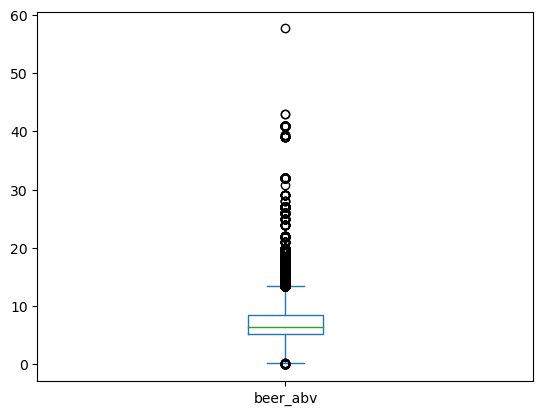

In [8]:
df['beer_abv'].plot(kind='box')

In [104]:
pd.options.display.float_format = '{:.6f}'.format
df['beer_abv'].describe()

count   1518829.000000
mean          7.042387
std           2.322526
min           0.010000
25%           5.200000
50%           6.500000
75%           8.500000
max          57.700000
Name: beer_abv, dtype: float64

In [10]:
df['beer_abv'].max()

57.7

In [11]:
df[df['beer_abv'] == df['beer_abv'].max()]

,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
brewery_id,,,,,,,,,,,,
6513,Schorschbräu,1316780901,4.0,4.0,4.0,kappldav123,Eisbock,4.0,3.5,Schorschbräu Schorschbock 57%,57.7,73368


## 1. Answering the question of who makes the strongest beer

In [12]:
df.groupby('brewery_name')['beer_abv'].max().sort_values(ascending=False)

brewery_name
Schorschbräu                                                  57.7
BrewDog                                                       41.0
De Struise Brouwers                                           39.0
Hair of the Dog Brewing Company / Brewery and Tasting Room    29.0
Boston Beer Company (Samuel Adams)                            27.0
                                                              ... 
Yellow Rose Brewing Company                                    NaN
Yozgut Bira Fabrikasi / Tekel Birasi                           NaN
Yuiga Doxon Ji Beer                                            NaN
Zea Rotisserie & Brewery                                       NaN
Zerodegrees Bristol                                            NaN
Name: beer_abv, Length: 5742, dtype: float64

In [13]:
grouped_by_abv = df.groupby('brewery_name')['beer_abv'].agg(['max', 'count']).sort_values(ascending=False, by='max')
grouped_by_abv

,max,count
brewery_name,,
Schorschbräu,57.7,34
BrewDog,41.0,4033
De Struise Brouwers,39.0,3866
Hair of the Dog Brewing Company / Brewery and Tasting Room,29.0,3769
Boston Beer Company (Samuel Adams),27.0,38812
...,...,...
Yellow Rose Brewing Company,NaN,0
Yozgut Bira Fabrikasi / Tekel Birasi,NaN,0
Yuiga Doxon Ji Beer,NaN,0


## So to answer the question, in theory Schorschbräu makes the strongest beer, but there are only 34 counts of reviews for it, so maybe it was limited. BrewDog makes a bit weaker beer, but there are many more reviews as seen on the plot below.

In [14]:
top_10_breweries = grouped_by_abv.head(10)
top_10_breweries_sorted = top_10_breweries.sort_values(by='count', ascending=False)

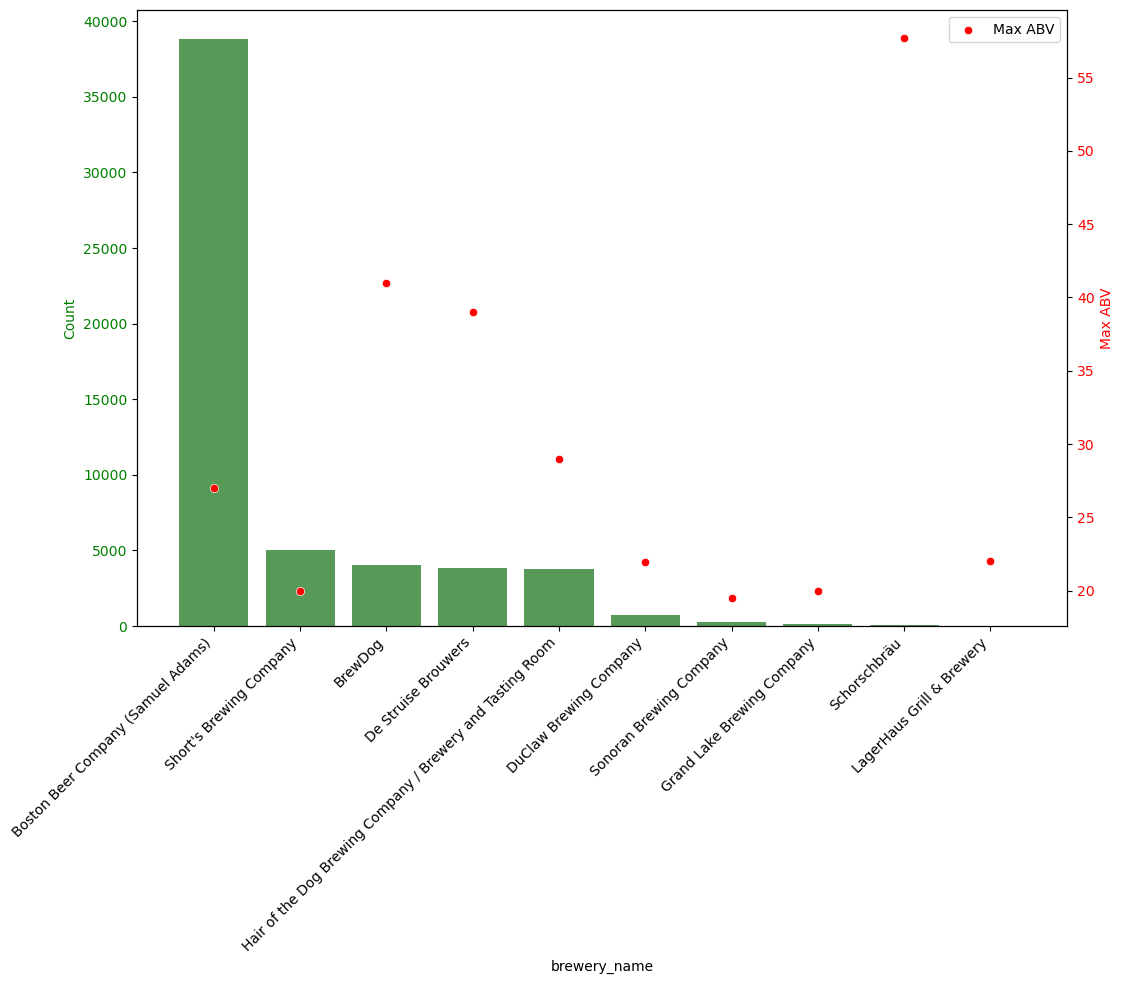

In [117]:
fig, ax1 = plt.subplots(figsize=(12, 8))

sns.barplot(x=top_10_breweries_sorted.index, y=top_10_breweries_sorted['count'], ax=ax1, color='green', label='Count', alpha=0.7)
ax1.set_ylabel('Count', color='green')
ax1.tick_params(axis='y', labelcolor='green')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')


ax2 = ax1.twinx()
sns.scatterplot(x=top_10_breweries_sorted.index, y=top_10_breweries_sorted['max'], ax=ax2, color='red', marker='o', label='Max ABV')
ax2.set_ylabel('Max ABV', color='red')
ax2.tick_params(axis='y', labelcolor='red')


In [ ]:
----------------------------------------------------------------------------------------------

## 2. Answering the question of top 3 beers to recommend to someone

## Since taste is 'quality' is a really subjective topic, I decide to firstly look at the review_overall mean for each beer that has over 500 reviews, but later I broke all reviews down so people can decide for themselves which review type is most suitable for them (tatse, aroma, etc.) 

In [212]:
grouped_by_rev_overall = df.groupby('beer_name')['review_overall'].agg(['mean', 'count'])
filtered_beers = grouped_by_rev_overall[(grouped_by_rev_overall['count'] >= 500)]
filtered_beers.sort_values(by='mean', ascending=False).head(3)

,mean,count
beer_name,,
Trappist Westvleteren 12,4.617925,1272
Pliny The Younger,4.600000,610
Founders CBS Imperial Stout,4.591052,637


In [136]:
grouped = df.groupby('beer_name').agg(
    review_overall_mean=('review_overall', 'mean'),
    review_overall_count=('review_overall', 'size'),
    review_aroma_mean=('review_aroma', 'mean'),
    review_appearance_mean=('review_appearance', 'mean'),
    review_palate_mean=('review_palate', 'mean'),
    review_taste_mean=('review_taste', 'mean')
)
grouped

,review_overall_mean,review_overall_count,review_aroma_mean,review_appearance_mean,review_palate_mean,review_taste_mean
beer_name,,,,,,
! (Old Ale),4.000000,1,4.500000,4.000000,4.000000,4.500000
"""100""",4.000000,5,4.000000,4.000000,4.000000,4.400000
"""100"" Pale Ale",4.000000,1,4.000000,3.500000,4.000000,4.000000
"""12"" Belgian Golden Strong Ale",4.000000,2,3.500000,4.250000,4.750000,4.500000
"""33"" Export",3.000000,3,3.000000,3.000000,3.166667,3.000000
...,...,...,...,...,...,...
Žamberecký Kanec Imperial Stout,3.750000,2,4.500000,4.500000,4.250000,4.000000
Ω-naught (Omeganaught),4.166667,3,4.000000,4.000000,3.500000,3.500000
“Chewy” Double IPA,2.500000,1,2.000000,4.000000,3.500000,2.500000


In [146]:
filtered_beers = grouped[(grouped['review_overall_count'] >= 1000)]
filtered_beers = filtered_beers.sort_values(by='review_overall_mean', ascending=False).head(3)
filtered_beers

,review_overall_mean,review_overall_count,review_aroma_mean,review_appearance_mean,review_palate_mean,review_taste_mean
beer_name,,,,,,
Trappist Westvleteren 12,4.617925,1272,4.583333,4.454009,4.633255,4.718553
Pliny The Elder,4.590028,2527,4.612188,4.388603,4.451326,4.630985
Weihenstephaner Hefeweissbier,4.515901,1981,4.296315,4.380363,4.283190,4.425038


In [ ]:
----------------------------------------------------------------------------------------------

## 3. Answering the question of factors that impact the quality the most

In [33]:
df

,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
brewery_id,,,,,,,,,,,,
10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883
...,...,...,...,...,...,...,...,...,...,...,...,...
14359,The Defiant Brewing Company,1162684892,5.0,4.0,3.5,maddogruss,Pumpkin Ale,4.0,4.0,The Horseman's Ale,5.2,33061
14359,The Defiant Brewing Company,1161048566,4.0,5.0,2.5,yelterdow,Pumpkin Ale,2.0,4.0,The Horseman's Ale,5.2,33061
14359,The Defiant Brewing Company,1160702513,4.5,3.5,3.0,TongoRad,Pumpkin Ale,3.5,4.0,The Horseman's Ale,5.2,33061


In [77]:
grouped_by_abv = df.groupby('beer_abv')['review_overall'].agg(['mean', 'count'])
filtered_beers = grouped_by_abv[(grouped_by_abv['count'] >= 1000)]
filtered_beers

,mean,count
beer_abv,,
2.5,3.683333,1170
3.5,3.352158,2780
3.6,3.564103,1170
3.8,3.635471,1934
3.9,3.472494,1636
...,...,...
13.5,4.168478,1564
14.0,3.729466,1741
14.5,4.055776,2268


## Below we can see that there is a non-linear trend between review overall and beer ABV, only after excluding noise of beers that were reviewed too few times

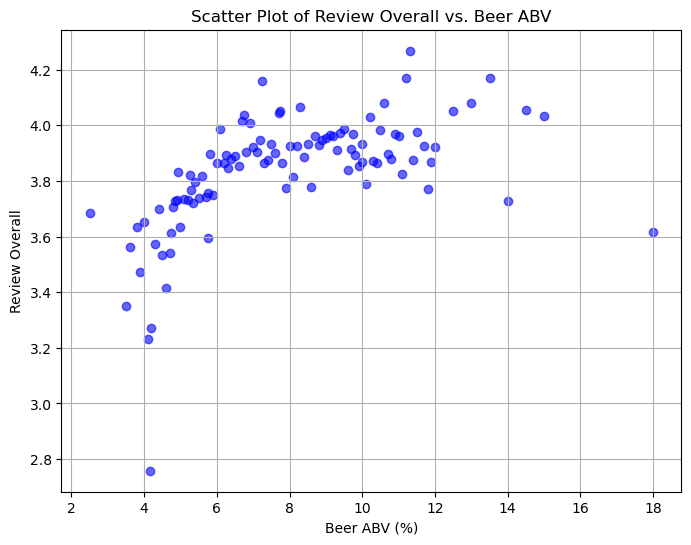

In [78]:
plt.figure(figsize=(8, 6))
plt.scatter(filtered_beers.index, filtered_beers['mean'], color='blue', alpha=0.6)
plt.title('Scatter Plot of Review Overall vs. Beer ABV')
plt.xlabel('Beer ABV (%)')
plt.ylabel('Review Overall')
plt.grid(True)
plt.show()

## Below I recategorized beer_style to draw a scatterplot between beer style and review overall, however there is no trend in the data.

In [80]:
filtered_beers.beer_style=df.beer_style.astype('category').cat.codes

C:\Users\Draseczka\AppData\Local\Temp\ipykernel_13920\1749337515.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  filtered_beers.beer_style=df.beer_style.astype('category').cat.codes


In [81]:
grouped_by_style = df.groupby('beer_style')['review_overall'].agg(['mean', 'count'])
filtered_beers = grouped_by_style[(grouped_by_style['count'] >= 1000)]
filtered_beers

,mean,count
beer_style,,
0,3.824054,7741
1,3.001659,30749
2,3.781010,45751
3,3.564601,9311
4,3.896756,26728
...,...,...
99,3.762564,8954
100,4.007969,9412
101,3.815563,3714


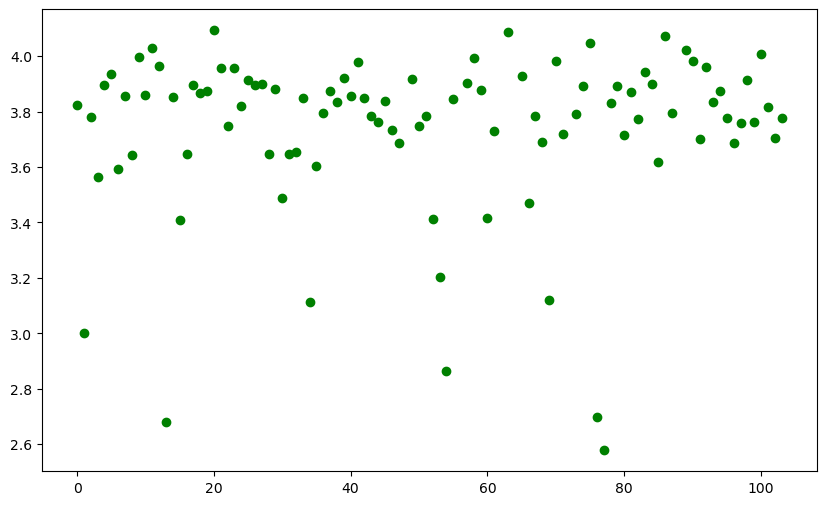

In [82]:
plt.figure(figsize=(10, 6))
plt.scatter(filtered_beers.index, filtered_beers['mean'], color='green')
plt.show()

## I also wanted to include corr matrix below to see how big of an impact each review types have on a review_overall_mean

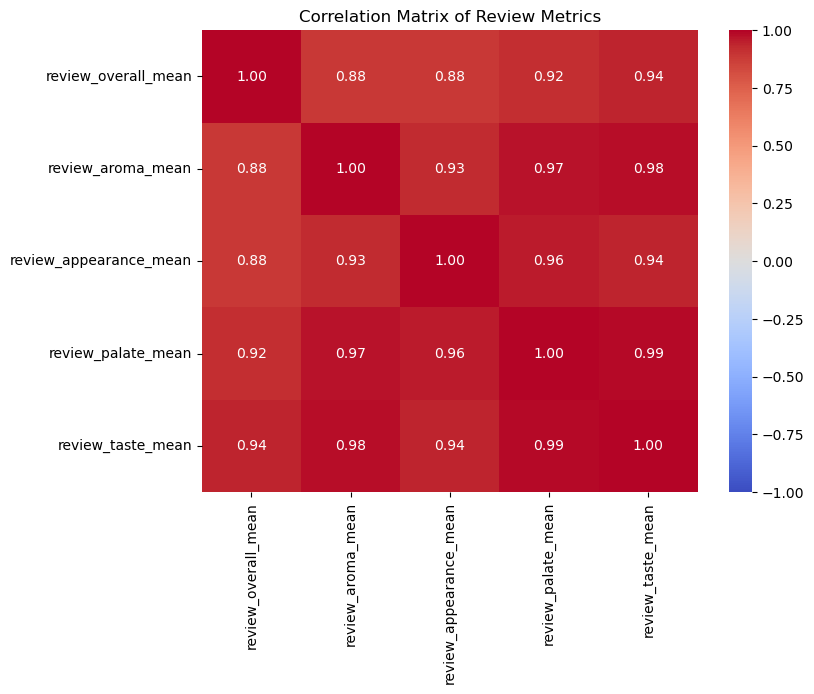

In [160]:
filtered_beers = grouped[(grouped['review_overall_count'] >= 1000)]

filtered_beers = filtered_beers.drop(columns='review_overall_count')

corr_matrix = filtered_beers.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Review Metrics')
plt.show()

In [ ]:
------------------------------------------------------------------------------------------------------------------

### 4. Answering the question of beer which aroma and appearance matches the beer style

##### Here I mostly followed instructions from an e-mail :)

In [163]:
df

,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
brewery_id,,,,,,,,,,,,
10325,Vecchio Birraio,1234817823,1.500000,2.000000,2.500000,stcules,Hefeweizen,1.500000,1.500000,Sausa Weizen,5.000000,47986
10325,Vecchio Birraio,1235915097,3.000000,2.500000,3.000000,stcules,English Strong Ale,3.000000,3.000000,Red Moon,6.200000,48213
10325,Vecchio Birraio,1235916604,3.000000,2.500000,3.000000,stcules,Foreign / Export Stout,3.000000,3.000000,Black Horse Black Beer,6.500000,48215
10325,Vecchio Birraio,1234725145,3.000000,3.000000,3.500000,stcules,German Pilsener,2.500000,3.000000,Sausa Pils,5.000000,47969
1075,Caldera Brewing Company,1293735206,4.000000,4.500000,4.000000,johnmichaelsen,American Double / Imperial IPA,4.000000,4.500000,Cauldron DIPA,7.700000,64883
...,...,...,...,...,...,...,...,...,...,...,...,...
14359,The Defiant Brewing Company,1162684892,5.000000,4.000000,3.500000,maddogruss,Pumpkin Ale,4.000000,4.000000,The Horseman's Ale,5.200000,33061
14359,The Defiant Brewing Company,1161048566,4.000000,5.000000,2.500000,yelterdow,Pumpkin Ale,2.000000,4.000000,The Horseman's Ale,5.200000,33061
14359,The Defiant Brewing Company,1160702513,4.500000,3.500000,3.000000,TongoRad,Pumpkin Ale,3.500000,4.000000,The Horseman's Ale,5.200000,33061


In [169]:
grouped_by_style = df.groupby('beer_style').agg({
    'review_aroma': 'mean',
    'review_appearance': 'mean'
})

In [199]:
grouped_by_style = grouped_by_style.rename(columns={
    'review_aroma': 'style_review_aroma',
    'review_appearance': 'style_review_appearance'
})

In [200]:
grouped_by_style

,style_review_aroma,style_review_appearance
beer_style,,
Altbier,3.624015,3.809327
American Adjunct Lager,2.480211,2.788546
American Amber / Red Ale,3.627254,3.810190
American Amber / Red Lager,3.213296,3.527494
American Barleywine,4.019343,4.036535
...,...,...
Vienna Lager,3.434108,3.698347
Weizenbock,4.044677,4.009297
Wheatwine,3.969036,3.907108


In [193]:
grouped_by_beer = df.groupby('beer_name').agg({
    'beer_style': 'first',
    'review_aroma': 'mean',
    'review_appearance': 'mean',
    'review_overall': 'size'
}).rename(columns={'review_overall': 'review_count'})


In [194]:
grouped_by_beer = grouped_by_beer.rename(columns={
    'review_aroma': 'beer_review_aroma',
    'review_appearance': 'beer_review_appearance',
    'review_count': 'beer_review_count'
})

In [195]:
grouped_by_beer

,beer_style,beer_review_aroma,beer_review_appearance,beer_review_count
beer_name,,,,
! (Old Ale),Old Ale,4.500000,4.000000,1
"""100""",Belgian Dark Ale,4.000000,4.000000,5
"""100"" Pale Ale",American IPA,4.000000,3.500000,1
"""12"" Belgian Golden Strong Ale",Belgian Strong Pale Ale,3.500000,4.250000,2
"""33"" Export",Dortmunder / Export Lager,3.000000,3.000000,3
...,...,...,...,...
Žamberecký Kanec Imperial Stout,Russian Imperial Stout,4.500000,4.500000,2
Ω-naught (Omeganaught),American IPA,4.000000,4.000000,3
“Chewy” Double IPA,American IPA,2.000000,4.000000,1


In [204]:
filtered_beers = grouped_by_beer[grouped_by_beer['beer_review_count'] >= 100]

filtered_beers = filtered_beers.reset_index()

In [205]:
merged_df = pd.merge(filtered_beers, grouped_by_style, on='beer_style', how='left')
merged_df

,beer_name,beer_style,beer_review_aroma,beer_review_appearance,beer_review_count,style_review_aroma,style_review_appearance
0,"""Shabadoo"" Black & Tan Ale",Black & Tan,3.717949,3.893162,117,3.271416,3.626166
1,# 100,American Barleywine,4.013761,4.153670,218,4.019343,4.036535
2,#9,Fruit / Vegetable Beer,3.434466,3.501040,1442,3.525560,3.517985
3,10 Commandments,Belgian Strong Dark Ale,4.061017,3.986441,295,3.972260,4.008293
4,10 Squared Fish Tale Ale,American Barleywine,3.946903,3.964602,113,4.019343,4.036535
...,...,...,...,...,...,...,...
3117,Éphémère (Cassis / Black Currant),Fruit / Vegetable Beer,3.834906,3.893868,212,3.525560,3.517985
3118,Équinoxe Du Printemps,Scotch Ale / Wee Heavy,3.958333,3.769444,180,3.875007,3.893584
3119,Ølfabrikken Porter,Baltic Porter,4.269113,4.305810,327,3.946379,4.039535
3120,Über Pils,German Pilsener,3.754386,3.925439,228,3.387159,3.572444


In [207]:
merged_df['aroma_diff'] = merged_df['beer_review_aroma'] - merged_df['style_review_aroma']
merged_df['appearance_diff'] = merged_df['beer_review_appearance'] - merged_df['style_review_appearance']
merged_df

,beer_name,beer_style,beer_review_aroma,beer_review_appearance,beer_review_count,style_review_aroma,style_review_appearance,aroma_diff,appearance_diff
0,"""Shabadoo"" Black & Tan Ale",Black & Tan,3.717949,3.893162,117,3.271416,3.626166,0.446532,0.266996
1,# 100,American Barleywine,4.013761,4.153670,218,4.019343,4.036535,-0.005582,0.117135
2,#9,Fruit / Vegetable Beer,3.434466,3.501040,1442,3.525560,3.517985,-0.091094,-0.016945
3,10 Commandments,Belgian Strong Dark Ale,4.061017,3.986441,295,3.972260,4.008293,0.088757,-0.021852
4,10 Squared Fish Tale Ale,American Barleywine,3.946903,3.964602,113,4.019343,4.036535,-0.072440,-0.071933
...,...,...,...,...,...,...,...,...,...
3117,Éphémère (Cassis / Black Currant),Fruit / Vegetable Beer,3.834906,3.893868,212,3.525560,3.517985,0.309345,0.375883
3118,Équinoxe Du Printemps,Scotch Ale / Wee Heavy,3.958333,3.769444,180,3.875007,3.893584,0.083326,-0.124140
3119,Ølfabrikken Porter,Baltic Porter,4.269113,4.305810,327,3.946379,4.039535,0.322734,0.266275
3120,Über Pils,German Pilsener,3.754386,3.925439,228,3.387159,3.572444,0.367227,0.352994


In [208]:
merged_df['total_diff'] = merged_df['aroma_diff'] + merged_df['appearance_diff']
merged_df

,beer_name,beer_style,beer_review_aroma,beer_review_appearance,beer_review_count,style_review_aroma,style_review_appearance,aroma_diff,appearance_diff,total_diff
0,"""Shabadoo"" Black & Tan Ale",Black & Tan,3.717949,3.893162,117,3.271416,3.626166,0.446532,0.266996,0.713528
1,# 100,American Barleywine,4.013761,4.153670,218,4.019343,4.036535,-0.005582,0.117135,0.111553
2,#9,Fruit / Vegetable Beer,3.434466,3.501040,1442,3.525560,3.517985,-0.091094,-0.016945,-0.108039
3,10 Commandments,Belgian Strong Dark Ale,4.061017,3.986441,295,3.972260,4.008293,0.088757,-0.021852,0.066905
4,10 Squared Fish Tale Ale,American Barleywine,3.946903,3.964602,113,4.019343,4.036535,-0.072440,-0.071933,-0.144373
...,...,...,...,...,...,...,...,...,...,...
3117,Éphémère (Cassis / Black Currant),Fruit / Vegetable Beer,3.834906,3.893868,212,3.525560,3.517985,0.309345,0.375883,0.685228
3118,Équinoxe Du Printemps,Scotch Ale / Wee Heavy,3.958333,3.769444,180,3.875007,3.893584,0.083326,-0.124140,-0.040813
3119,Ølfabrikken Porter,Baltic Porter,4.269113,4.305810,327,3.946379,4.039535,0.322734,0.266275,0.589009
3120,Über Pils,German Pilsener,3.754386,3.925439,228,3.387159,3.572444,0.367227,0.352994,0.720222


In [210]:
merged_df['abs_total_diff'] = merged_df['total_diff'].abs()
sorted_df = merged_df.sort_values(by='abs_total_diff', ascending=True)
sorted_df

,beer_name,beer_style,beer_review_aroma,beer_review_appearance,beer_review_count,style_review_aroma,style_review_appearance,aroma_diff,appearance_diff,total_diff,abs_total_diff
2839,Tooheys New,American Adjunct Lager,2.367925,2.900943,106,2.480211,2.788546,-0.112286,0.112397,0.000111,0.000111
2965,Very Bad Elf,English Pale Ale,3.493333,3.623333,150,3.420626,3.695881,0.072707,-0.072547,0.000160,0.000160
3046,Winter Warmer,Winter Warmer,3.723744,3.827626,438,3.707178,3.844635,0.016567,-0.017009,-0.000443,0.000443
3033,Wild Devil,Belgian IPA,3.943617,4.110638,470,3.979753,4.075214,-0.036136,0.035424,-0.000712,0.000712
1904,Old Jock Ale,Scotch Ale / Wee Heavy,3.799107,3.968750,112,3.875007,3.893584,-0.075900,0.075166,-0.000734,0.000734
...,...,...,...,...,...,...,...,...,...,...,...
2546,Sol,Witbier,2.298046,2.584691,307,3.640876,3.686695,-1.342830,-1.102005,-2.444835,2.444835
680,Crazy Ed's Cave Creek Chili Beer,Chile Beer,1.951311,2.101124,267,3.300087,3.347113,-1.348777,-1.245989,-2.594766,2.594766
515,Bud Extra,Herbed / Spiced Beer,1.988281,2.121094,128,3.572265,3.600223,-1.583983,-1.479129,-3.063112,3.063112
524,Budweiser Chelada,Fruit / Vegetable Beer,1.942029,2.000000,138,3.525560,3.517985,-1.583531,-1.517985,-3.101517,3.101517
